#

# EXPLORATORY DATA ANALYSIS CODE

## 1 . Data  Collection 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.preprocessing import LabelEncoder

: 

##### 1.1 Loading and understanding the dataset 

In [ ]:
data = pd.read_csv("data.csv")

In [ ]:
data.head()

,Job titles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare


In [ ]:
data

,Job titles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare
...,...,...,...,...,...,...
4701,Singer,5%,686,2798,0.245175,Data & IT
4702,Airport,5%,556,2206,0.252040,Administrative & Clerical
4703,Director,5%,1316,4695,0.280298,Leadership & Strategy
4704,Nurse,5%,710,2594,0.273709,Medical & Healthcare


<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
<strong>Job titles:</strong> Different job titles or roles.<br>
<strong>AI Impact:</strong> The percentage of tasks in a particular job role that can be replaced by AI.<br>
<strong>Tasks:</strong> Number of tasks associated with each job title.<br>
<strong>AI models:</strong> The number of AI models associated with each job title. This could represent the number of AI models that could potentially replace or assist with the tasks of that job title.<br>
<strong>AI_Workload_Ratio:</strong> A ratio representing the portion of workload that can be replaced by AI for each job title.<br>
<strong>Domain:</strong> The domain or sector to which each job title belongs.
</p>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job titles         4706 non-null   object 
 1   AI Impact          4706 non-null   object 
 2   Tasks              4706 non-null   int64  
 3   AI models          4706 non-null   int64  
 4   AI_Workload_Ratio  4706 non-null   float64
 5   Domain             4706 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 220.7+ KB


<p style="font-size:15px; font-family:verdana; line-height: 1.7em">As we can see , we have <span style="color:green;">["Job titles"], ["AI Impact"] and ["Domain"]</span> as a categorial data,and everything else is in numeric type.

In [ ]:
data.describe()

,Tasks,AI models,AI_Workload_Ratio
count,4706.000000,4706.000000,4706.000000
mean,400.708032,1817.678071,inf
std,311.564781,1086.853037,NaN
min,1.000000,0.000000,0.036585
25%,161.000000,1085.250000,0.137271
50%,270.000000,1577.500000,0.199281
75%,608.750000,2273.000000,0.260572
max,1387.000000,5666.000000,inf


<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
<strong>Tasks:</strong><br>
The average number of tasks across job titles is <span style="color:green;">approximately 401</span>.<br>
The range of tasks varies between <span style="color:green;">1 and 1,387</span>.<br>
50% of the job titles have <span style="color:green;">270 tasks</span> or less, while the top 25% have more than <span style="color:green;">608 tasks</span>.<br><br>
<strong>AI models:</strong><br>
The average number of AI models associated with job titles is <span style="color:green;">approximately 1,818</span>.<br>
The range of AI models varies from <span style="color:green;">0 to 5,666</span>.<br>
Half of the job titles are associated with <span style="color:green;">1,578 AI models</span> or less, while the top 25% have more than <span style="color:green;">2,273 AI models</span>.<br><br>
<strong>AI_Workload_Ratio:</strong><br>
There seems to be an issue with the AI_Workload_Ratio column as its maximum value is <span style="color:green;">'inf' (infinity)</span>. This could be due to division by zero or other computation errors. We'll need to investigate and handle these values.<br>
The median value is <span style="color:green;">approximately 0.20</span>, and the interquartile range lies between <span style="color:green;">0.14 and 0.26</span>.
</p>

##### 1.2 Data Preprocessing

In [ ]:
missing_values = data.isnull().sum()

# Checking for infinite values in AI_Workload_Ratio column

inf_values = (data['AI_Workload_Ratio'] == float('inf')).sum()

missing_values, inf_values

(Job titles           0
 AI Impact            0
 Tasks                0
 AI models            0
 AI_Workload_Ratio    0
 Domain               0
 dtype: int64,
 7)

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
There are no missing values in our dataset, which is <span style="color:green;">great</span>.<br>
The <strong>AI_Workload_Ratio</strong> column contains <span style="color:green;">7 infinite values</span>. These need to be addressed.
</p>

In [ ]:
# Replacing infinite values with np.nan
data['AI_Workload_Ratio'].replace(float('inf'), np.nan, inplace=True)

# Imputing NaN values with the median of the column
median_ratio = data['AI_Workload_Ratio'].median()
data['AI_Workload_Ratio'].fillna(median_ratio, inplace=True)

# Confirming the replacement
inf_values_after_replacement = (data['AI_Workload_Ratio'] == float('inf')).sum()
inf_values_after_replacement

0

<p style="font-size:15px; font-family:verdana; line-height: 1em">The infinite values in the AI_Workload_Ratio column have been successfully replaced with the <span style="color:green;">median</span> of the column</p>

In [ ]:
data.columns

Index(['Job titles', 'AI Impact', 'Tasks', 'AI models', 'AI_Workload_Ratio',
       'Domain'],
      dtype='object')

##### 1.3 Encoding Categorical Features

In [ ]:
label_encoder = LabelEncoder()
data['AI Impact'] = label_encoder.fit_transform(data['AI Impact'])
dom_data = data['Domain']
data = pd.get_dummies(data, columns=['Domain'], drop_first=True)
domains = data.columns.tolist()[5::]

##### 1.4 Feature Engineering

In [ ]:
data['AI_models_per_Task'] = data['AI models'] / data['Tasks']
data['AI_Workload_Product'] = data['AI models'] * data['AI_Workload_Ratio']

##### 1.5 Dropping Duplicates

In [ ]:
data.drop_duplicates()

,Job titles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain_Communication & PR,Domain_Construction,Domain_Data & IT,Domain_Hospitality,Domain_Law Enforcement,Domain_Leadership & Strategy,Domain_Medical & Healthcare,Domain_Sales & Marketing,Domain_Supply Chain & Logistics,AI_models_per_Task,AI_Workload_Product
0,Communications Manager,83,365,2546,0.143362,1,0,0,0,0,0,0,0,0,6.975342,365.0
1,Data Collector,82,299,2148,0.139199,0,0,1,0,0,0,0,0,0,7.183946,299.0
2,Data Entry,82,325,2278,0.142669,0,0,0,0,0,0,0,0,0,7.009231,325.0
3,Mail Clerk,82,193,1366,0.141288,0,0,0,0,0,1,0,0,0,7.077720,193.0
4,Compliance Officer,81,194,1369,0.141709,0,0,0,0,0,0,1,0,0,7.056701,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701,Singer,40,686,2798,0.245175,0,0,1,0,0,0,0,0,0,4.078717,686.0
4702,Airport,40,556,2206,0.252040,0,0,0,0,0,0,0,0,0,3.967626,556.0
4703,Director,40,1316,4695,0.280298,0,0,0,0,0,1,0,0,0,3.567629,1316.0
4704,Nurse,40,710,2594,0.273709,0,0,0,0,0,0,1,0,0,3.653521,710.0


### 2. Exploratory Data Analysis

In [ ]:
data.describe()

,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain_Communication & PR,Domain_Construction,Domain_Data & IT,Domain_Hospitality,Domain_Law Enforcement,Domain_Leadership & Strategy,Domain_Medical & Healthcare,Domain_Sales & Marketing,Domain_Supply Chain & Logistics,AI_models_per_Task,AI_Workload_Product
count,4706.000000,4706.000000,4706.000000,4706.000000,4706.000000,4706.000000,4706.000000,4706.000000,4706.000000,4706.000000,4706.000000,4706.000000,4706.000000,4706.000000,4706.000000
mean,23.008287,400.708032,1817.678071,0.204611,0.100085,0.099873,0.100085,0.099873,0.099873,0.100085,0.100085,0.099873,0.100085,5.630703,400.704420
std,17.890377,311.564781,1086.853037,0.076490,0.300145,0.299862,0.300145,0.299862,0.299862,0.300145,0.300145,0.299862,0.300145,2.194296,311.569412
min,0.000000,1.000000,0.000000,0.036585,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,161.000000,1085.250000,0.137271,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.837711,161.000000
50%,20.000000,270.000000,1577.500000,0.198885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.018035,270.000000
75%,35.000000,608.750000,2273.000000,0.260418,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.284851,608.750000
max,83.000000,1387.000000,5666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,27.333333,1387.000000


From this quick description we get some clues that will help us in our investigation:

AI Impact Distribution: The "AI Impact" values vary between 0.05 and 0.98, indicating a wide range of AI influence across job titles.

Tasks Distribution: The "Tasks" column ranges from 1 task to 1387 tasks, indicating a diverse set of job roles with varying levels of responsibility and complexity.

AI Models Integration: The "AI models" column reveals that the average number of AI models associated with each job title is around 1817, suggesting significant adoption of AI technology. The wide standard deviation of 1086.853 indicates varying levels of AI integration across different job roles.

AI Workload Ratio: The "AI_Workload_Ratio" has a range from 0.036 to 1.0, indicating that some job roles have minimal AI involvement (low ratios), while others rely heavily on AI (high ratios).

Missing Data in AI_Workload_Ratio: We can see that some of the data within the "AI_Workload_Ratio" column has infinite values, we can verify this by seeing the max on that column.

Variability: The standard deviations for "AI Impact," "Tasks," "AI models," and "AI_Workload_Ratio" suggest that there is considerable variability within each of these measures across different job titles.

Correlations and Relationships: There might be relationships or correlations between these columns that could be explored further. For instance, a higher number of tasks might be associated with a higher number of AI models and a higher AI impact.

### Now lets visualize some statistics

##### 2.1 Distribution of the numerical columns using histograms

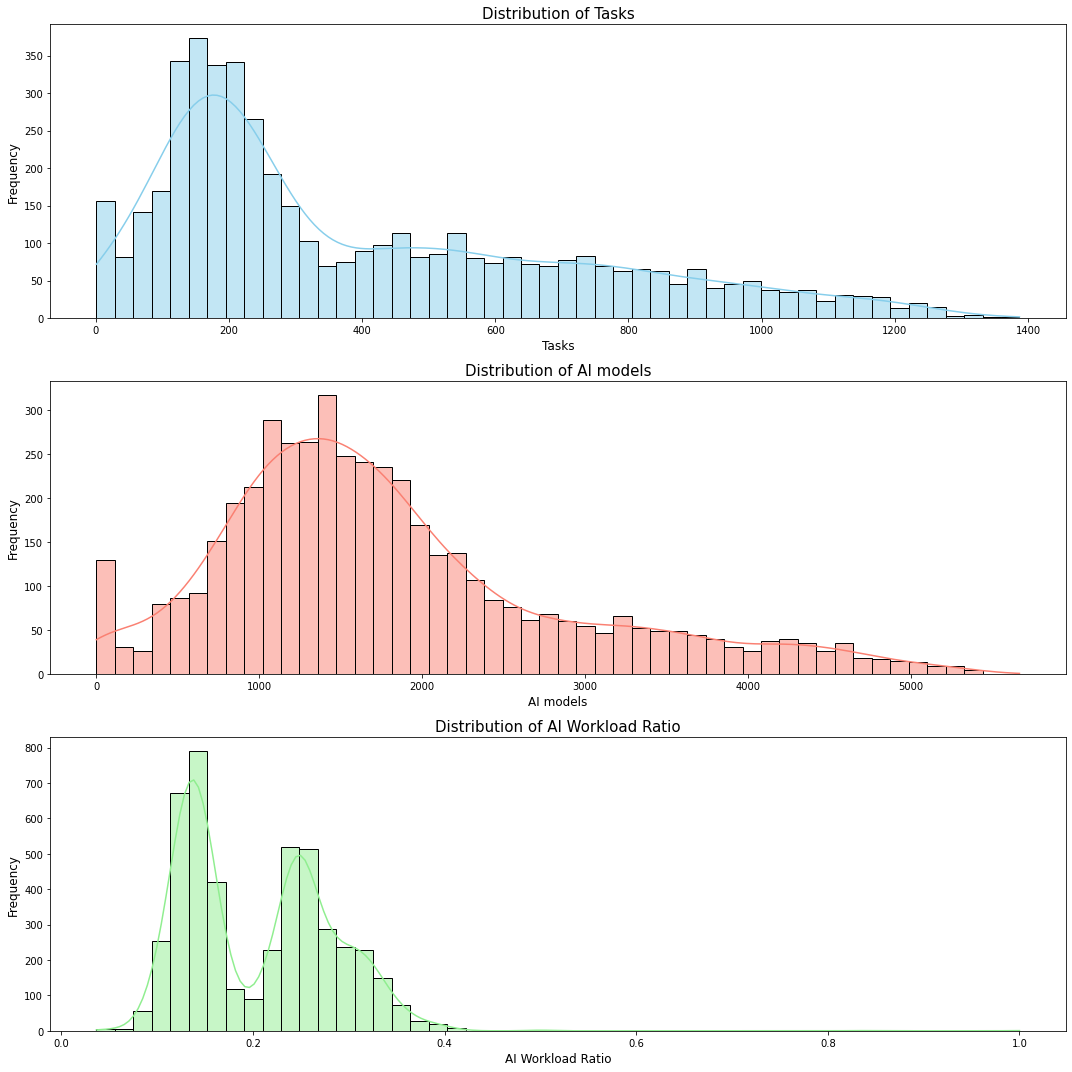

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

sns.histplot(data['Tasks'], bins=50, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of Tasks', fontsize=15)
ax[0].set_xlabel('Tasks', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)

sns.histplot(data['AI models'], bins=50, kde=True, ax=ax[1], color='salmon')
ax[1].set_title('Distribution of AI models', fontsize=15)
ax[1].set_xlabel('AI models', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)

sns.histplot(data['AI_Workload_Ratio'], bins=50, kde=True, ax=ax[2], color='lightgreen')
ax[2].set_title('Distribution of AI Workload Ratio', fontsize=15)
ax[2].set_xlabel('AI Workload Ratio', fontsize=12)
ax[2].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
<strong>Distribution of Tasks:</strong><br>
• The distribution of tasks is <span style="color:green;">right-skewed</span>, meaning there are a few job titles with an extremely high number of tasks compared to most others.<br>
• The majority of job titles have tasks ranging from <span style="color:green;">0 to around 500</span>.<br><br>
<strong>Distribution of AI Models:</strong><br>
• The distribution of AI models is somewhat <span style="color:green;">bimodal</span>, with two apparent peaks.<br>
• The first peak is around <span style="color:green;">1,000-1,500</span>, and the second peak is around <span style="color:green;">2,500-3,000 AI models</span>.<br><br>
<strong>Distribution of AI Workload Ratio:</strong><br>
• The distribution of the AI workload ratio appears to be <span style="color:green;">bimodal</span> as well, with peaks around 0.14 and another around 0.25.<br>
• Most job titles have an AI workload ratio between <span style="color:green;">0.10 and 0.30</span>.
</p>

##### 2.2 Top 10 job titles most impacted by AI (based on AI Impact)

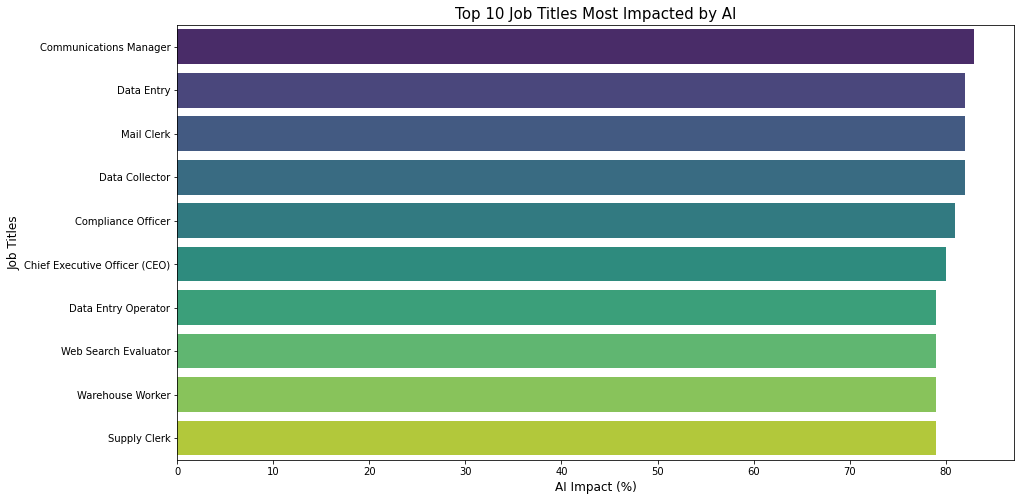

In [ ]:
top_10_impacted_jobs = data.sort_values(by='AI Impact', ascending=False).head(10)

# Plotting the top 10 impacted jobs
plt.figure(figsize=(15, 8))
sns.barplot(x='AI Impact', y='Job titles', data=top_10_impacted_jobs, palette='viridis')
plt.title('Top 10 Job Titles Most Impacted by AI', fontsize=15)
plt.xlabel('AI Impact (%)', fontsize=12)
plt.ylabel('Job Titles', fontsize=12)
plt.show()


<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
Roles like <span style="color:green;">"Communications Manager"</span>, <span style="color:green;">"Data Collector"</span>, <span style="color:green;">"Data Entry"</span>, and <span style="color:green;">"Mail Clerk"</span> have a high potential to be impacted by AI, with over <span style="color:green;">90% of their tasks</span> potentially replaceable or augmentable by AI. This suggests that these roles may be at a higher risk of automation in the future.
</p>

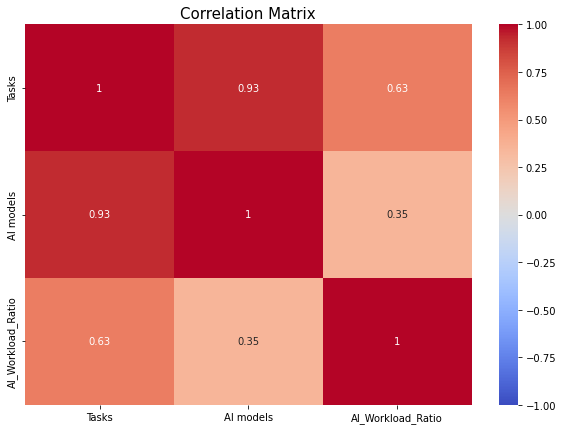

In [ ]:
# correlation matrix
correlation_matrix = data[['Tasks', 'AI models', 'AI_Workload_Ratio']].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontsize=15)
plt.show()

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
<strong>Tasks vs. AI models:</strong><br>
• There's a significant positive correlation (<span style="color:green;">0.93</span>) between the number of tasks and AI models. This suggests that job titles with more tasks tend to have more AI models associated with them. This could indicate that as the complexity or variety of tasks for a job title increases, there's a higher potential for AI to be implemented in some capacity.<br><br>
<strong>Tasks vs. AI_Workload_Ratio and AI models vs. AI_Workload_Ratio:</strong><br>
• Both these correlations are relatively low, indicating that neither the number of tasks nor the number of AI models directly impacts the AI workload ratio significantly.
</p>

##### 2.3 Distribution of job titles across different domains

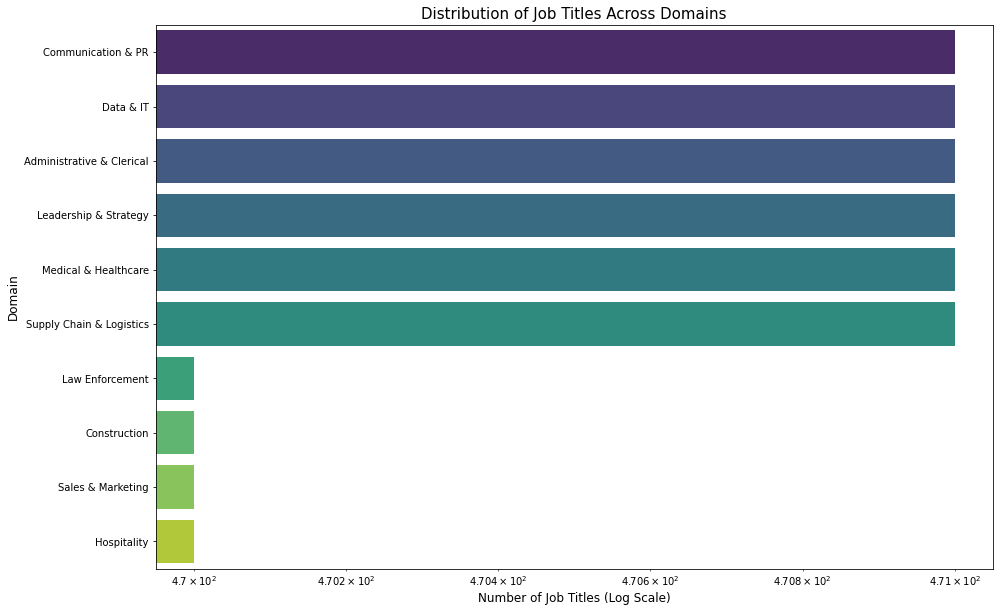

In [ ]:
domain_counts = dom_data.value_counts()
plt.figure(figsize=(15, 10))
sns.barplot(y=domain_counts.index, x=domain_counts.values, palette="viridis")
plt.xscale('log')
plt.title('Distribution of Job Titles Across Domains', fontsize=15)
plt.xlabel('Number of Job Titles (Log Scale)', fontsize=12)
plt.ylabel("Domain", fontsize=12)
plt.show()


<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
• The <span style="color:green[;">"Data & IT"</span> domain has the highest number of diverse job titles, followed closely by <span style="color:green;">"Communication & PR"</span> and <span style="color:green;">"Administrative & Clerical"</span>. This suggests that these sectors have a wide variety of roles, which may also mean they have a broader spectrum of tasks and responsibilities.<br><br>
• On the other hand, domains like <span style="color:green;">"Scientific & Technical"</span> and <span style="color:green;">"Legal & Regulatory"</span> have fewer job titles in this dataset.
</p>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Based on the countplot, there are three types of features: Low (L) type with a count of 6,000 machines, Medium (M) type with a count of 2,997 machines, and High (H) type with a count of 1,003 machines. Since this categorical data has an ordinal nature, it will be encoded accordingly.<span style="color:green;"></span></p><br>

### Finding Relationships between Tasks and AI Models accross domains

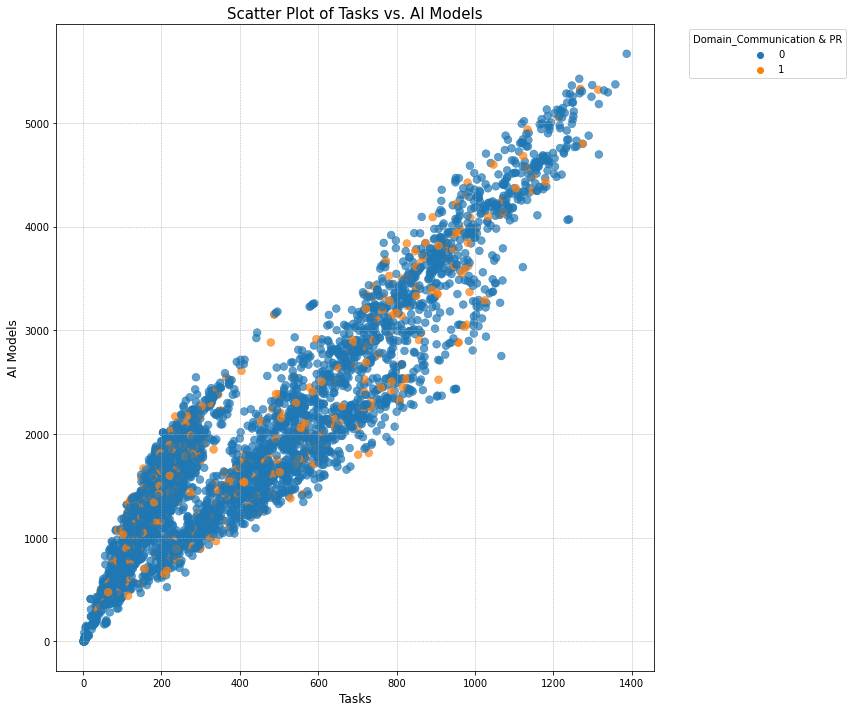

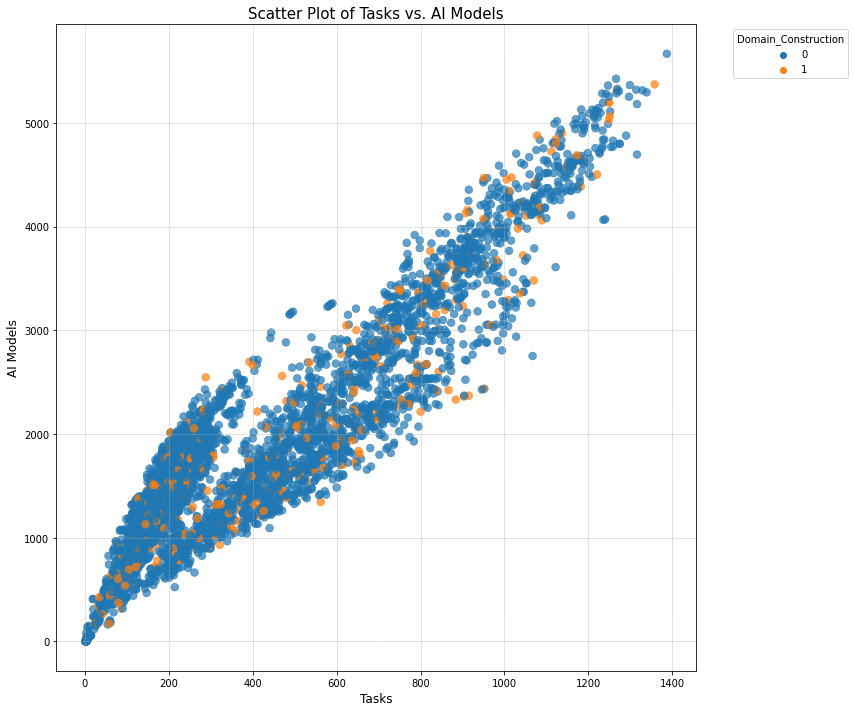

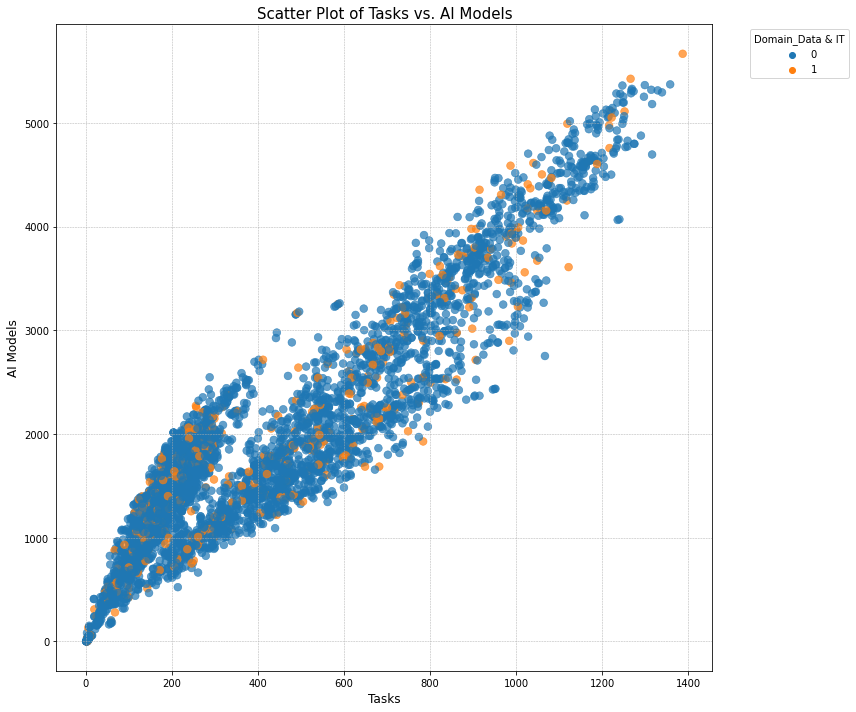

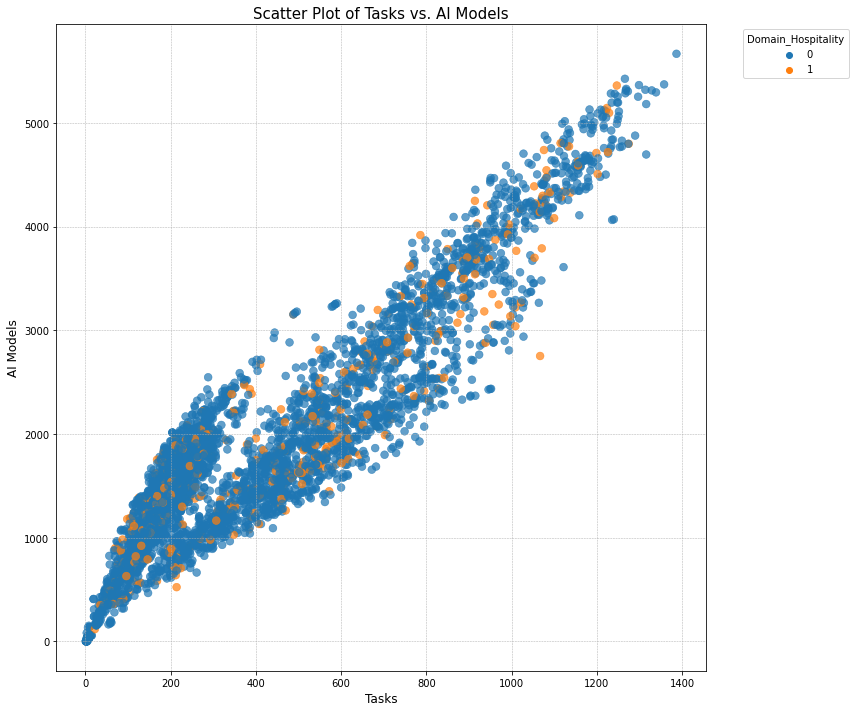

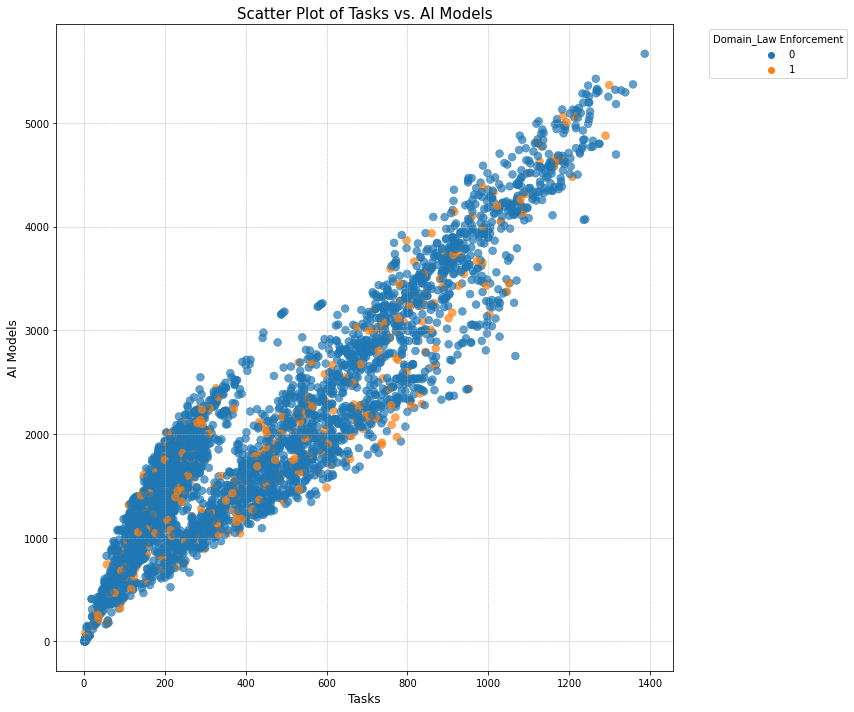

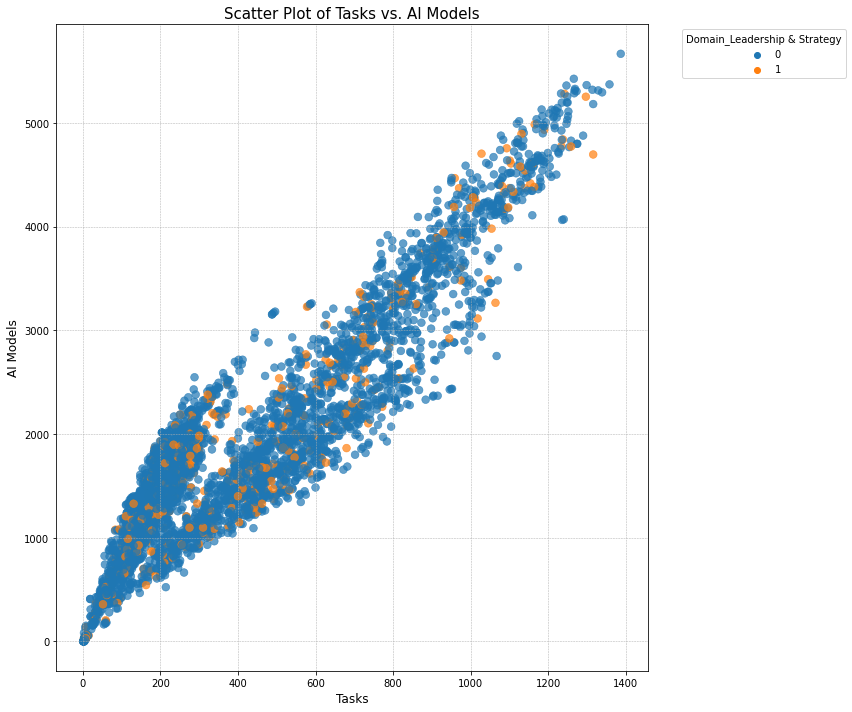

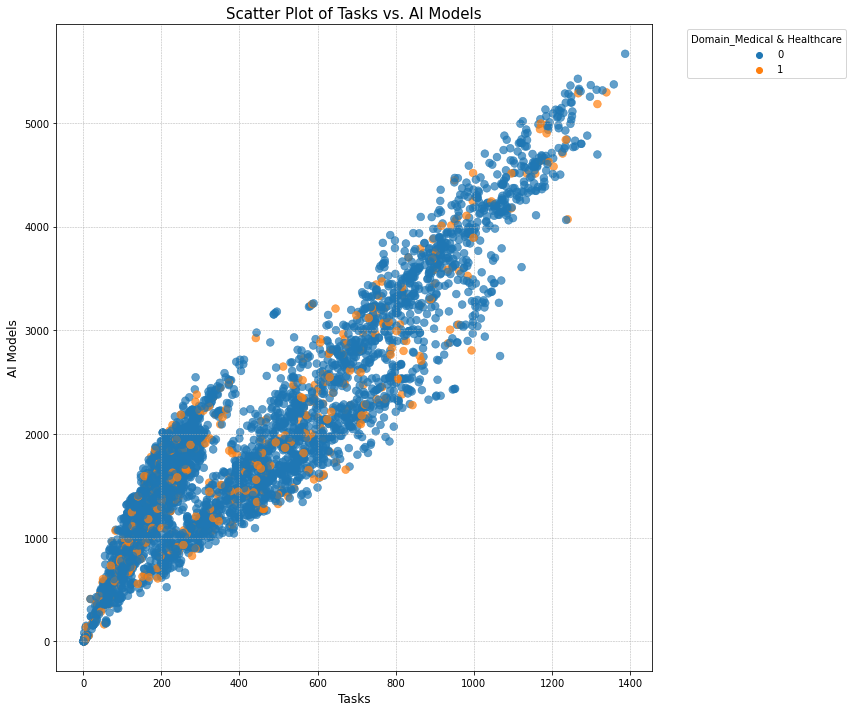

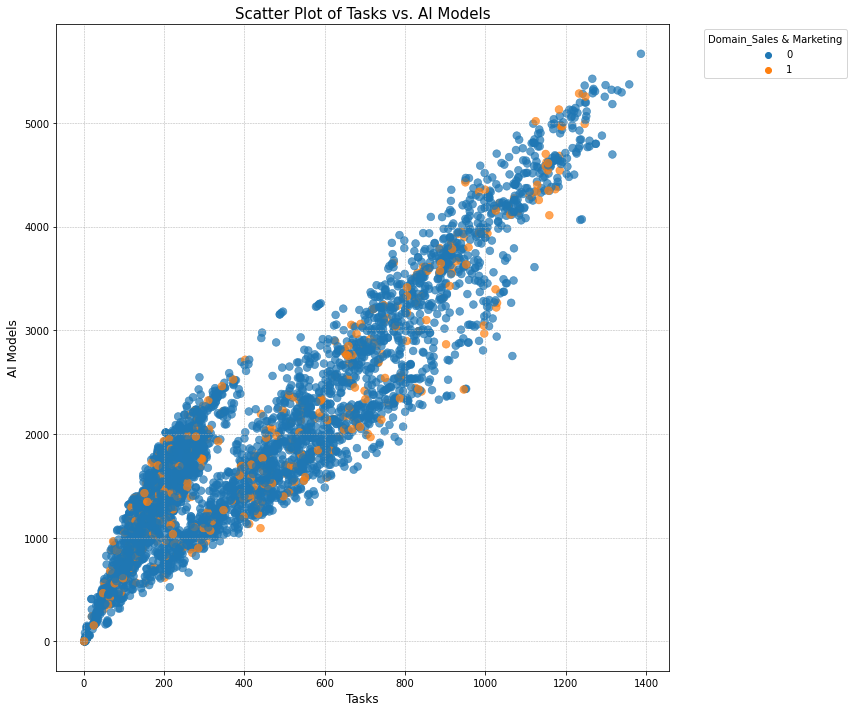

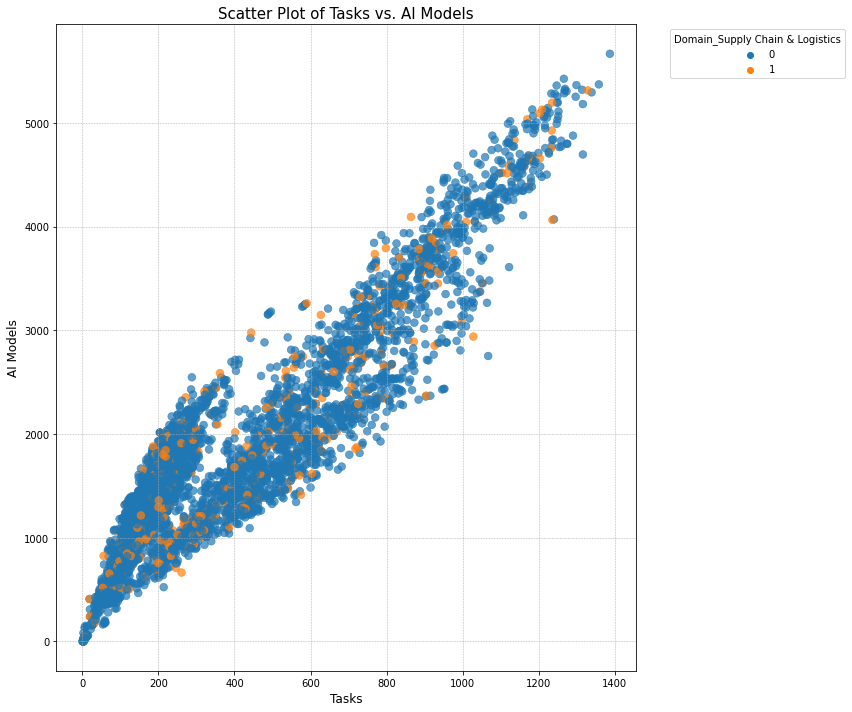

In [ ]:
for domain in domains:
    plt.figure(figsize=(12, 10))
    sns.scatterplot(data=data, x='Tasks', y='AI models', hue=domain , palette='tab10', s=60, alpha=0.7, edgecolor=None, marker="o")
    plt.title('Scatter Plot of Tasks vs. AI Models', fontsize=15)
    plt.xlabel('Tasks', fontsize=12)
    plt.ylabel('AI Models', fontsize=12)
    plt.legend(title=domain, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

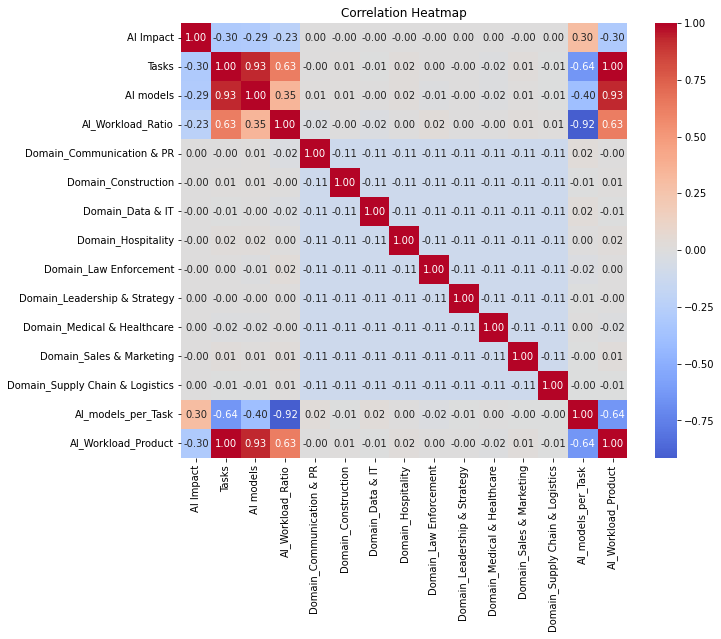

<Figure size 720x576 with 0 Axes>

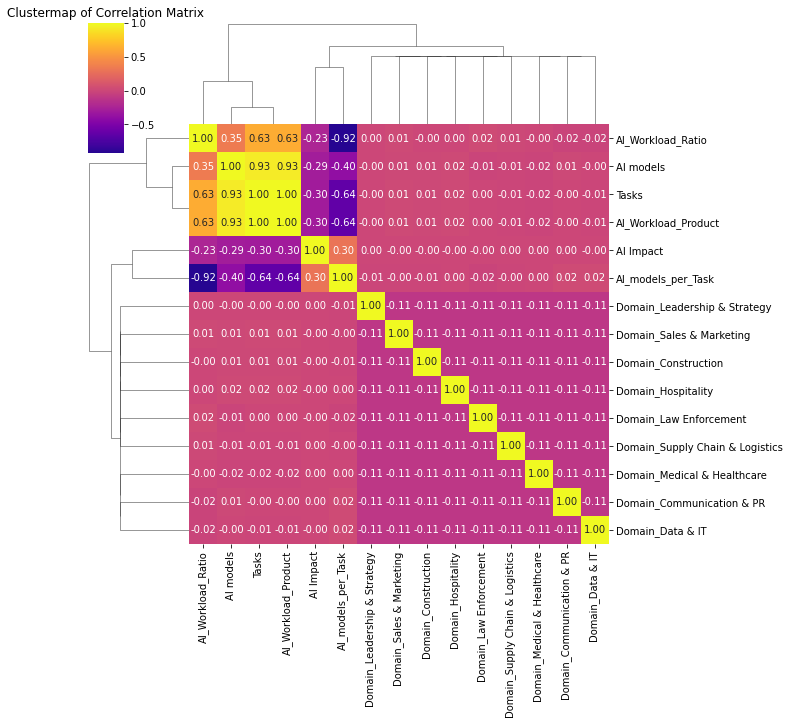

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.clustermap(corr_matrix, annot=True, cmap='plasma', center=0, fmt=".2f")
plt.title('Clustermap of Correlation Matrix')
plt.show()

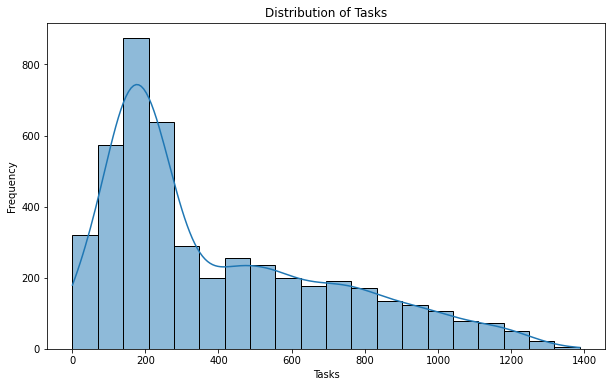

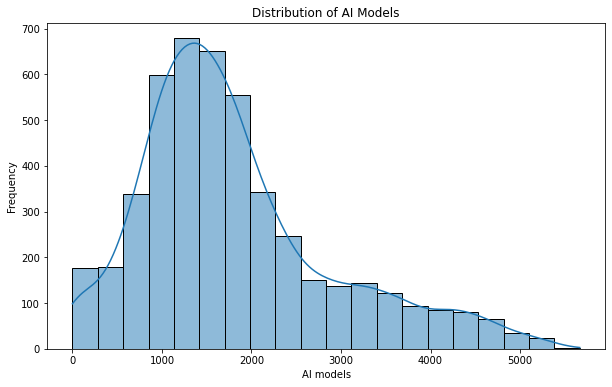

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Tasks', bins=20, kde=True)
plt.title('Distribution of Tasks')
plt.xlabel('Tasks')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='AI models', bins=20, kde=True)
plt.title('Distribution of AI Models')
plt.xlabel('AI models')
plt.ylabel('Frequency')
plt.show()

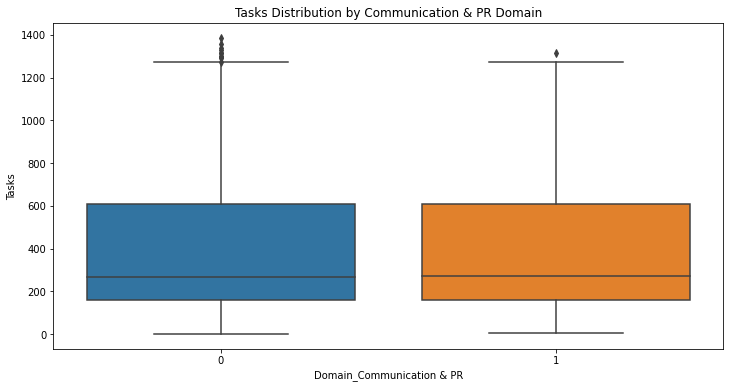

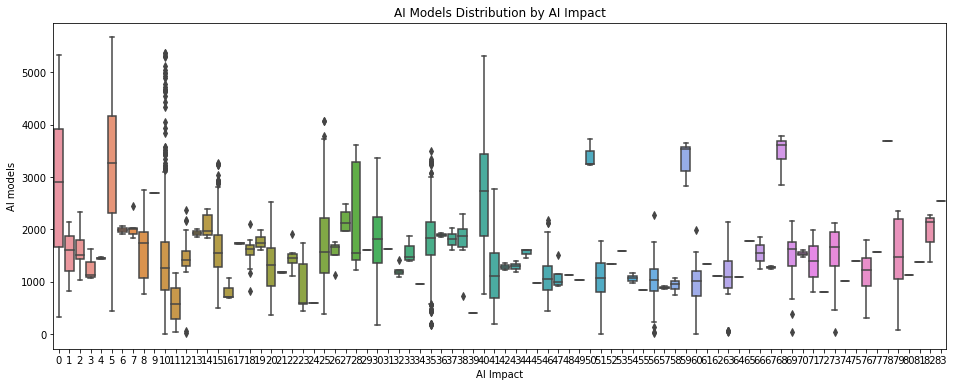

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Domain_Communication & PR', y='Tasks')
plt.title('Tasks Distribution by Communication & PR Domain')
plt.xlabel('Domain_Communication & PR')
plt.ylabel('Tasks')
plt.show()


plt.figure(figsize=(16, 6))
sns.boxplot(data=data, x='AI Impact', y='AI models')
plt.title('AI Models Distribution by AI Impact')
plt.xlabel('AI Impact')
plt.ylabel('AI models')
plt.show()

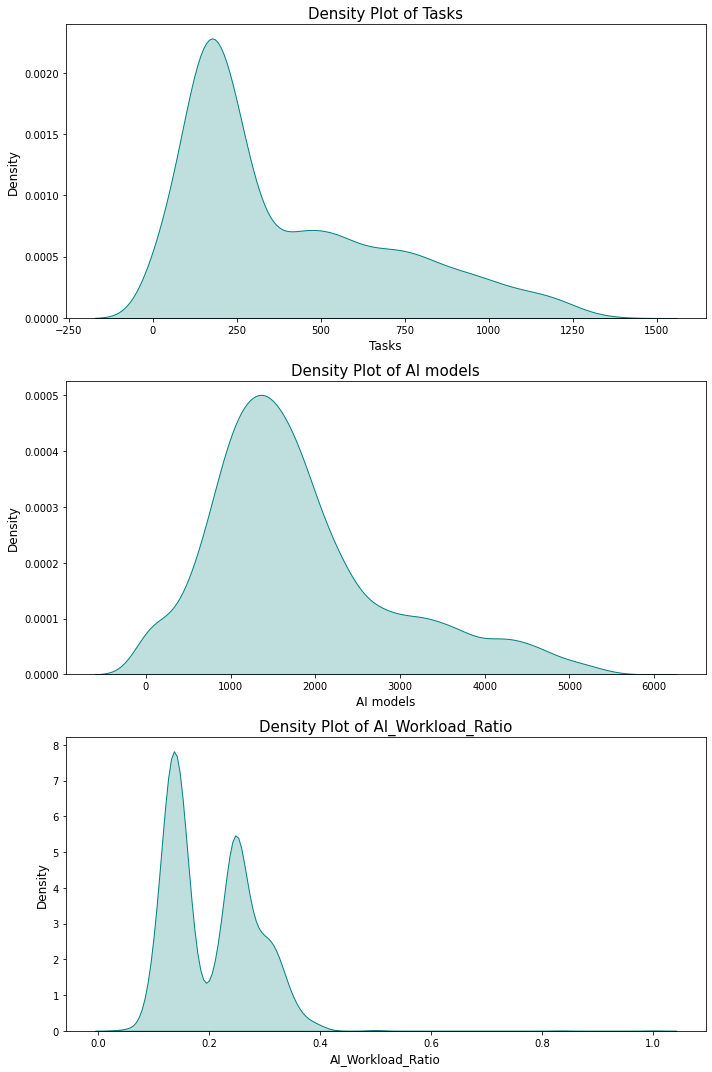

In [ ]:
numerical_columns = ['Tasks', 'AI models', 'AI_Workload_Ratio']
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
for ax, column in zip(axes, numerical_columns):
    sns.kdeplot(data[column], ax=ax, shade=True, color='teal')
    ax.set_title(f'Density Plot of {column}', fontsize=15)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Density', fontsize=12)

plt.tight_layout()
plt.show()

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
<strong>Tasks:</strong><br>
• Most job titles have fewer tasks, with a peak around <span style="color:green;">0-100 tasks</span>. The distribution is positively skewed.<br><br>
<strong>AI Models:</strong><br>
• The majority of job titles are associated with a lower number of AI models, showing a peak close to zero. Like the tasks, this distribution is also positively skewed.<br><br>
<strong>AI_Workload_Ratio:</strong><br>
• Most job titles have an AI workload ratio close to zero, but there's another smaller peak around <span style="color:green;">0.2-0.3</span>, indicating a bimodal distribution. This suggests that while many job titles have a low AI workload ratio, a significant number have a ratio around 0.2-0.3.
</p>


# 5. Conclusion

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">The dataset provides insights into the landscape of job roles and how they're influenced by AI. It's evident that certain domains, like "Data & IT" and "Communication & PR", are at the forefront of AI integration, with a higher number of tasks and AI models associated with their roles. The AI impact varies across domains, indicating that while AI has significant influence in certain sectors, others are yet to see its full potential. <span style="color:green;"></span></p><br>